In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [211]:
def ABC(prior_sample, simulator, summary_statistic, data, ϵ, max_iters, n_samples):
    samples = []
    n_iters = 0
    while len(samples) < n_samples:
        params = prior_sample()
        summary = summary_statistic(simulator(params))
        summary_data = summary_statistic(data)
        if np.linalg.norm(summary - summary_data) < ϵ:
            samples.append(params)
        n_iters += 1
        if n_iters > max_iters:
            return "did not converge"
    return samples

In [196]:
import pymc as pm

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [200]:
def normal_simulator(params):
    μ, σ = params
    return np.random.normal(μ, σ, 1000)

def summary_statistic(data):
    return np.array((np.mean(data), np.std(data)))

def prior_sample():
    return (np.random.uniform(-1,1), np.random.uniform(0,1))

summary_statistic(normal_simulator((0,1)))

array([-0.03927825,  0.98624814])

In [216]:
ABC_normal = ABC(prior_sample, normal_simulator, summary_statistic, normal_simulator((0,1)), 0.1, 100000, 500)

import seaborn as sns


/var/folders/17/2brgtwwj25d0g2886hjmjkyc0000gn/T/ipykernel_51262/2180018758.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ABC_normal[:, 0])


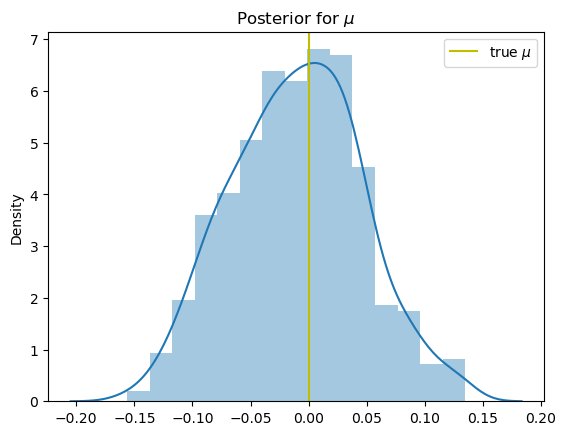

In [253]:
ABC_normal = np.array(ABC_normal)
sns.distplot(ABC_normal[:, 0])
plt.title("Posterior for $\mu$")
plt.axvline(0, label='true $\mu$', color='y')
plt.legend()
plt.show()

/var/folders/17/2brgtwwj25d0g2886hjmjkyc0000gn/T/ipykernel_51262/4189332132.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ABC_normal[:, 1])


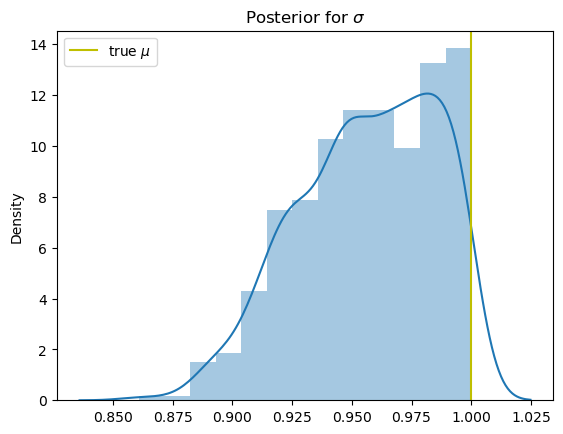

In [254]:
sns.distplot(ABC_normal[:, 1])
plt.title("Posterior for $\sigma$")
plt.axvline(1, label='true $\mu$', color='y')
plt.legend()
plt.show()

In [267]:
def ABC_for_photons(prior, simulator, data, ϵ=50, n_samples=100):
    samples = []
    n_iters = 0
    while len(samples) < n_samples:
        params = prior.sample()
        data_sample = simulator(params)
        if np.linalg.norm(data_sample - data) < ϵ:
            samples.append(params)
            print (params)
        n_iters += 1
        if n_iters > 100000:
            return "did not converge"
    return samples

In [268]:
alpha1 = 0.5
prior = torch.distributions.Uniform(torch.tensor([0.0]), torch.tensor([1.0]))
data = ABC_for_photons(prior, compress_data, compress_data(alpha1))



tensor([0.3889])
tensor([0.5976])
tensor([0.4403])
tensor([0.5809])
tensor([0.4205])
tensor([0.4680])
tensor([0.4788])
tensor([0.4026])
tensor([0.5235])
tensor([0.4872])
tensor([0.5670])
tensor([0.4623])
tensor([0.6069])
tensor([0.4677])
tensor([0.5028])
tensor([0.4452])
tensor([0.4986])
tensor([0.4298])
tensor([0.5525])
tensor([0.4205])
tensor([0.3868])
tensor([0.3922])
tensor([0.4713])
tensor([0.5417])
tensor([0.6576])
tensor([0.4749])
tensor([0.4922])
tensor([0.3862])
tensor([0.5788])
tensor([0.4948])
tensor([0.5916])
tensor([0.5207])
tensor([0.5346])
tensor([0.5300])
tensor([0.5303])
tensor([0.4173])
tensor([0.4089])
tensor([0.4825])
tensor([0.5980])
tensor([0.5109])
tensor([0.4658])
tensor([0.4350])
tensor([0.4819])
tensor([0.4627])
tensor([0.5042])
tensor([0.5413])
tensor([0.4907])
tensor([0.4418])
tensor([0.5680])
tensor([0.4264])
tensor([0.5204])
tensor([0.3650])
tensor([0.5411])
tensor([0.5506])
tensor([0.4884])
tensor([0.5169])
tensor([0.5173])
tensor([0.5062])
tensor([0.5408

Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

/var/folders/17/2brgtwwj25d0g2886hjmjkyc0000gn/T/ipykernel_51262/1657373523.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.array(posterior), bins=30, hist=False, kde=True, label='SNPE Posterior distribution')
/var/folders/17/2brgtwwj25d0g2886hjmjkyc0000gn/T/ipykernel_51262/1657373523.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.g

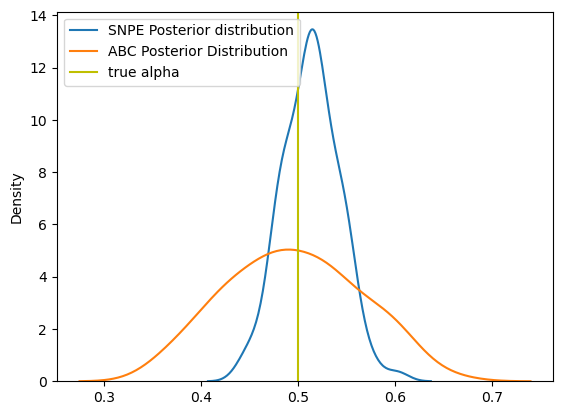

In [272]:
alpha=0.5
x = compress_data(alpha)
posterior = alpha_posterior.sample((100,), x=x)
sns.distplot(np.array(posterior), bins=30, hist=False, kde=True, label='SNPE Posterior distribution')
sns.distplot(data, bins=30, hist=False, kde=True, label='ABC Posterior Distribution')
plt.axvline(alpha, label='true alpha', color='y')
plt.legend()
plt.show()